In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import seaborn as sns
from scipy.stats import zscore

In [4]:
data_benin = pd.read_csv('../data/benin-malanville.csv')

## Data Overview

In [5]:
data_benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Data cleaning

In [6]:
missing_values = data_benin.isnull().sum()
print("missing_values in each column")
print(missing_values)

missing_values in each column
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [7]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Precipitation']

# Count negative values in each of these columns
negative_values_report = data_benin[columns_to_check].lt(0).sum()
print("Number of negative values in each column:")
print(negative_values_report)

Number of negative values in each column:
GHI              258847
DNI              275987
DHI              259182
ModA                  0
ModB                  0
WS                    0
WSgust                0
Precipitation         0
dtype: int64


In [8]:
# Remove rows where any of the listed columns contain negative values
data_benin_cleaned = data_benin[(data_benin[columns_to_check] >= 0).all(axis=1)]
print(f"Original DataFrame size: {data_benin.shape}")
print(f"Cleaned DataFrame size: {data_benin_cleaned.shape}")

Original DataFrame size: (525600, 19)
Cleaned DataFrame size: (246878, 19)


#### Exploratory Data Analysis (EDA)

C:\Users\hp\AppData\Local\Temp\ipykernel_19868\3002506423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_benin_cleaned['Timestamp'] = pd.to_datetime(data_benin_cleaned['Timestamp'])  # Ensure Timestamp is in datetime format


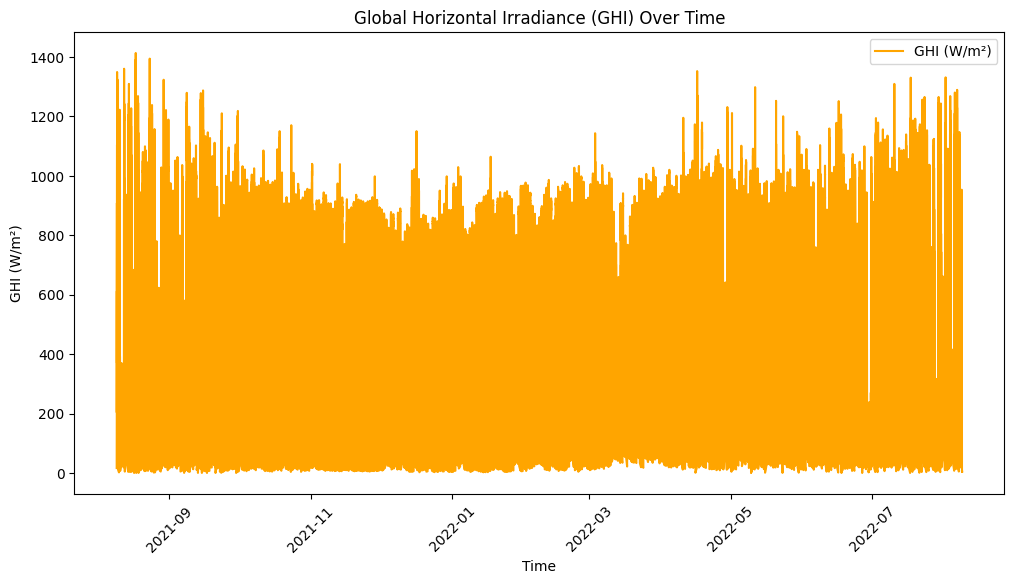

In [9]:

data_benin_cleaned['Timestamp'] = pd.to_datetime(data_benin_cleaned['Timestamp'])  # Ensure Timestamp is in datetime format
data_benin_cleaned.set_index('Timestamp', inplace=True)  # Set Timestamp as the index

# Plot GHI over time
plt.figure(figsize=(12, 6))
plt.plot(data_benin_cleaned.index, data_benin_cleaned['GHI'], color='orange', label='GHI (W/m²)')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()


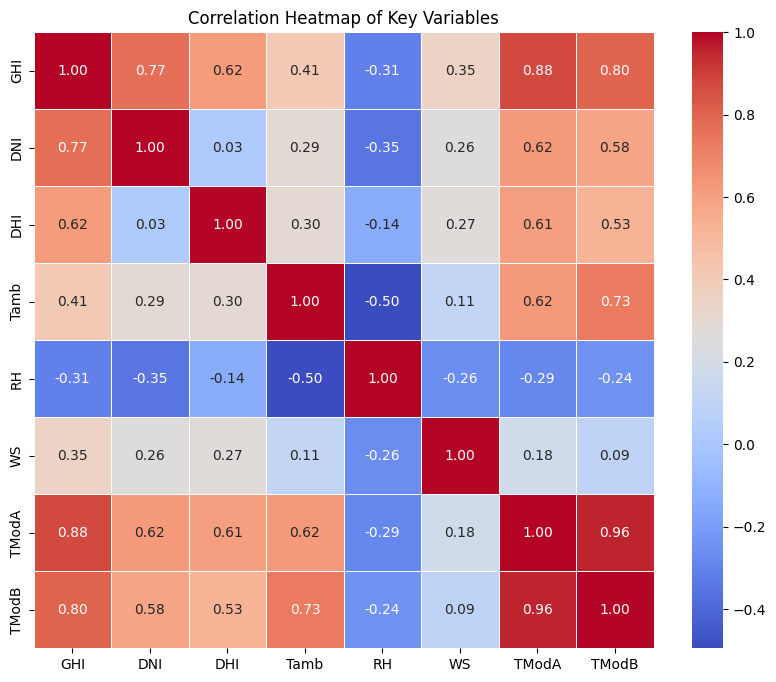

In [8]:
# 2️ Plot the correlation heatmap
columns_to_correlate = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'TModA', 'TModB']
correlation_matrix = data_benin_cleaned[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

## Wind Analysis

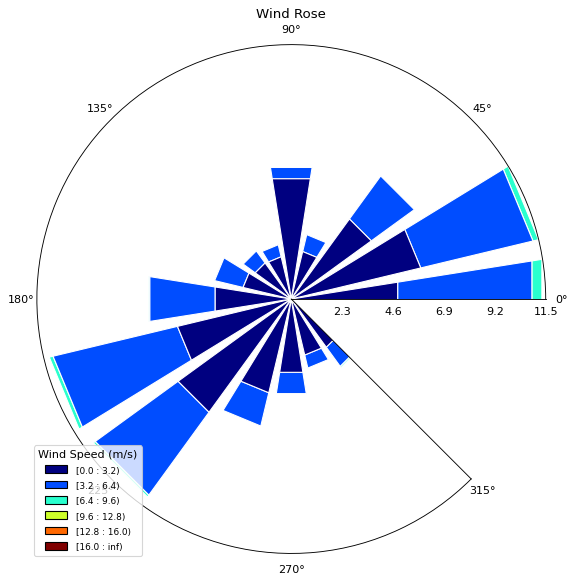

In [10]:
# ----------------------- Wind Analysis -----------------------
# Wind Rose Plot
def wind_rose_plot(data_benin_cleaned):
    ax = WindroseAxes.from_ax()
    ax.bar(data_benin_cleaned['WD'], data_benin_cleaned['WS'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend(title="Wind Speed (m/s)")
    plt.title("Wind Rose")
    plt.show()

wind_rose_plot(data_benin_cleaned)

## Temperature Analysis

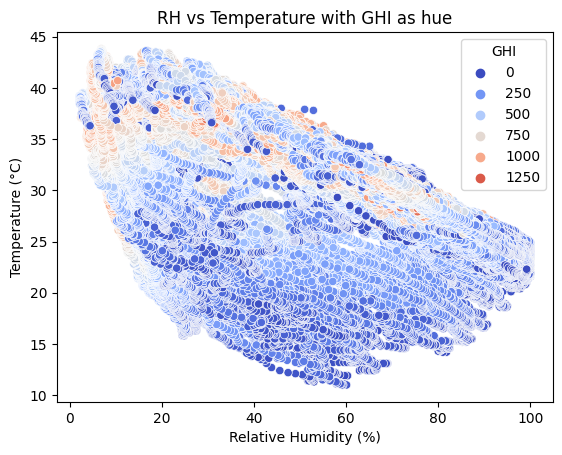

In [11]:

# ----------------------- Temperature Analysis -----------------------
# Relative Humidity vs Temperature and Solar Radiation
sns.scatterplot(x=data_benin_cleaned['RH'], y=data_benin_cleaned['Tamb'], hue=data_benin_cleaned['GHI'], palette='coolwarm')
plt.title("RH vs Temperature with GHI as hue")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Temperature (°C)")
plt.show()

## Histograms 

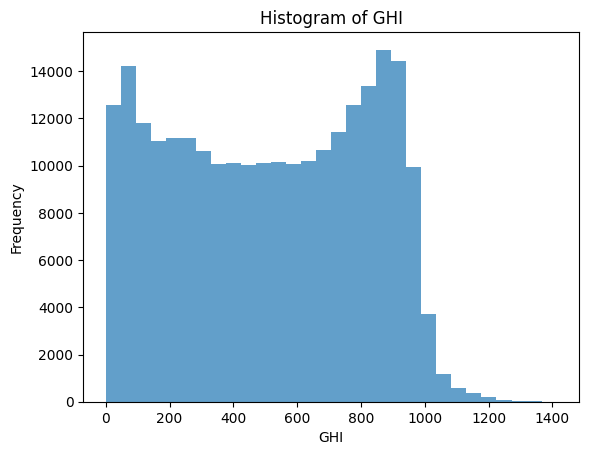

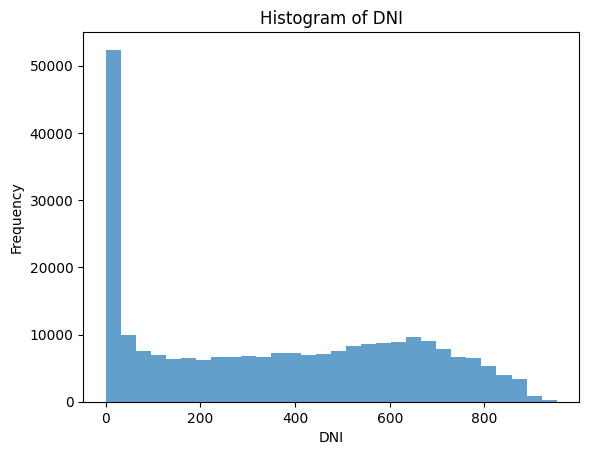

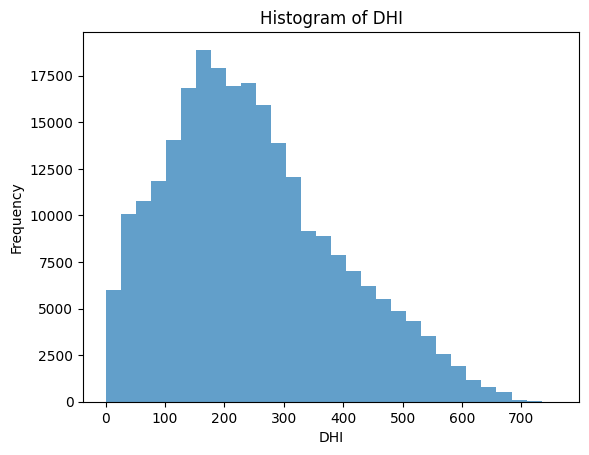

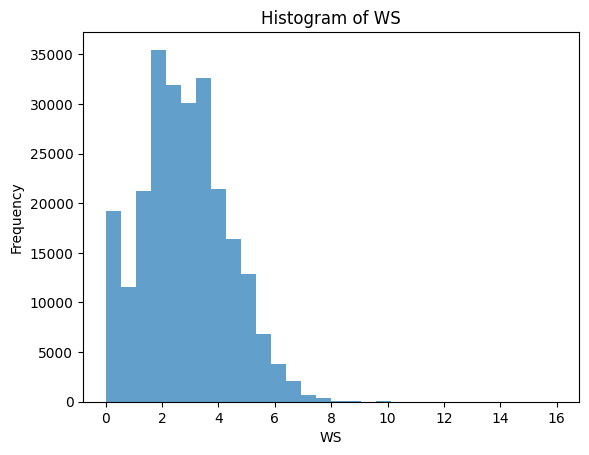

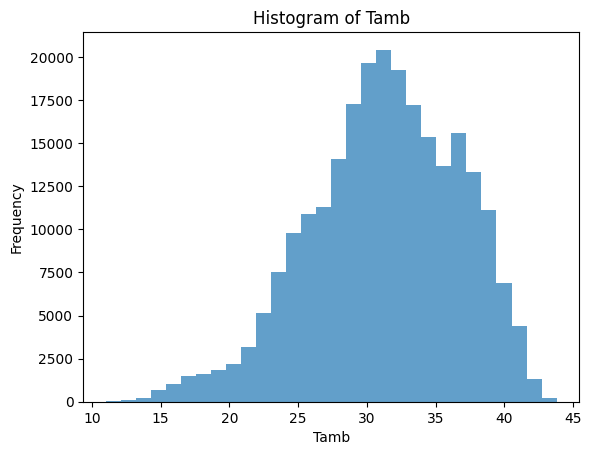

In [ ]:
# ----------------------- Histograms -----------------------
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
for var in variables:
    plt.hist(data_benin_cleaned[var].dropna(), bins=30, alpha=0.7, label=var)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


## Z-Score Analysis

In [12]:
# ----------------------- Z-Score Analysis -----------------------
# Flagging Anomalous Points
data_benin_cleaned['GHI_Z'] = zscore(data_benin_cleaned['GHI'])
anomalies = data_benin_cleaned[np.abs(data_benin_cleaned['GHI_Z']) > 3]
print(f"Number of anomalies in GHI: {len(anomalies)}")

Number of anomalies in GHI: 0


C:\Users\windows 10\AppData\Local\Temp\ipykernel_13348\3622680488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_benin_cleaned['GHI_Z'] = zscore(data_benin_cleaned['GHI'])


## Bubble Chart

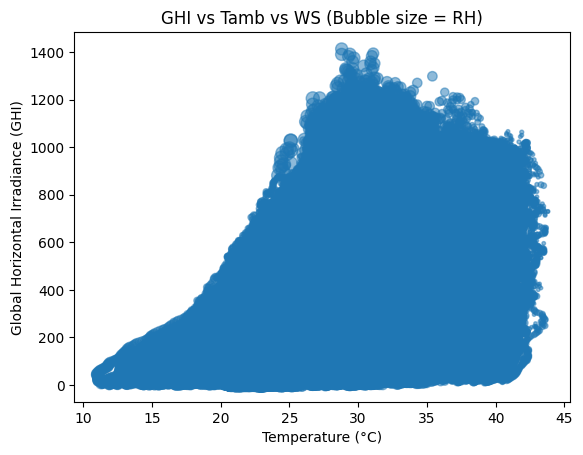

In [13]:
# ----------------------- Bubble Chart -----------------------
# GHI vs Tamb vs WS with RH as bubble size
plt.scatter(data_benin_cleaned['Tamb'], data_benin_cleaned['GHI'], s=data_benin_cleaned['RH'], alpha=0.5, label="RH size")
plt.title("GHI vs Tamb vs WS (Bubble size = RH)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (GHI)")
plt.show()